# Spaceship Titanic

- 세번째 시도
    - Tensorflow 모듈을 사용한 의사결정트리 사용

## Import Modules

In [1]:
import os
import sys
from datetime import datetime
from zipfile import ZipFile
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf
import tensorflow_decision_forests as tfdf

2024-01-10 13:12:25.486473: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 13:12:25.510606: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:12:25.510631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:12:25.511173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:12:25.515418: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.config.list_physical_devices()

2024-01-10 13:12:26.578568: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:12:26.602250: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:12:26.602296: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2024-01-10 13:12:26.621450: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:12:26.621587: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:12:26.621617: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:12:27.628362: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:12:27.628426: I external/local_xla/xla/stream_executor

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16409602990964647211
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9816768512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16481050775124456149
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

## Set envs

In [4]:
PATH_INPUT = './data/in/'
PATH_OUTPUT = './data/out/'
NOW_STR = datetime.now().strftime('%Y%m%d_%H%M%S')
PATH_OUTPUT_NOW = f'./data/out/{NOW_STR}/'

config = tf.config.experimental.set_memory_growth(device=tf.config.list_physical_devices('GPU')[0], enable=True)

## Get Data

In [5]:
df_train = pd.read_csv('./data/out/preprocessed_data/train_int.csv')
df_test = pd.read_csv('./data/out/preprocessed_data/test_int.csv')

## Train

### Set Input data

In [6]:
exception_cols = ['PassengerId', 'Name']
independents = [ i for i in df_train.keys() if i not in exception_cols ]
# 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'

X = df_train[independents]

X_tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(X, label="Transported")

2024-01-10 13:12:27.709908: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:12:27.710041: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:12:27.710072: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:12:27.710377: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 13:12:27.710389: I tensorflow/core/common_runtime/gpu/gpu

In [7]:
X.shape

(8693, 16)

### Check available all models

In [8]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

### 1. Use RandomForestModel

#### Build Model

In [9]:
model = tfdf.keras.RandomForestModel(verbose=1)
model.compile(
    metrics=['accuracy']
)

Use /tmp/tmp4qoxtf0i as temporary training directory


#### Fit Model

In [10]:
history = model.fit(X_tf_dataset, verbose=1)

Reading training dataset...
Training dataset read in 0:00:02.392663. Found 8693 examples.
Training model...


[INFO 24-01-10 13:12:31.4212 KST kernel.cc:1233] Loading model from path /tmp/tmp4qoxtf0i/model/ with prefix 083e5eed85834489


Model trained in 0:00:00.978661
Compiling model...


[INFO 24-01-10 13:12:31.7051 KST decision_forest.cc:660] Model loaded with 300 root(s), 314894 node(s), and 15 input feature(s).
[INFO 24-01-10 13:12:31.7051 KST abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-01-10 13:12:31.7051 KST kernel.cc:1061] Use fast generic engine


Model compiled.


#### Visualize Model

##### logs

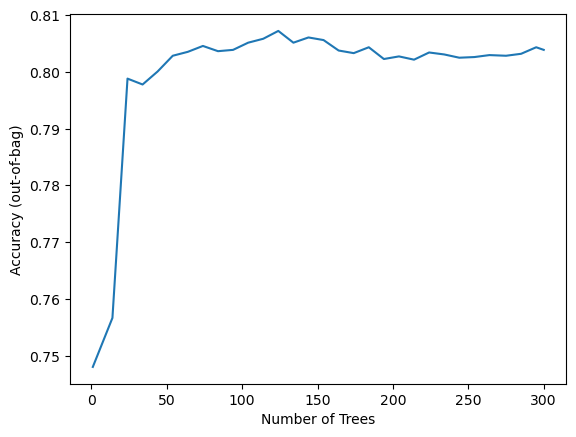

In [11]:
logs = model.make_inspector().training_logs()
plt.plot([ log.num_trees for log in logs ], [ log.evaluation.accuracy for log in logs ])
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [12]:
path_out_plot = os.path.join(PATH_OUTPUT_NOW, "monitor")
if not os.path.exists(path_out_plot):
    os.makedirs(path_out_plot)

path_out_plot = os.path.join(path_out_plot, "RandomForest_model_plot.html")

# vscode - jupyter 경우 사진이 안보임 -> 로컬에 저장. Colab일 경우 보여줌
if 'vscode' in os.environ['PATH'] and 'google.colab' not in list(sys.modules.keys()):
    with open(path_out_plot, "w") as f:
        f.write(tfdf.model_plotter.plot_model(model, tree_idx=0, max_depth=3))
else:
    tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

#### Validation

In [13]:
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=8693, accuracy=0.8038651788795582, loss=0.4527257500017308, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [14]:
print(f"Available variable importances: {inspector.variable_importances().keys()}")

Available variable importances: dict_keys(['SUM_SCORE', 'INV_MEAN_MIN_DEPTH', 'NUM_NODES', 'NUM_AS_ROOT'])


In [15]:
print(inspector.variable_importances()["NUM_AS_ROOT"])

[("CryoSleep" (1; #4), 118.0), ("RoomService" (1; #10), 50.0), ("Spa" (1; #12), 47.0), ("VRDeck" (1; #14), 41.0), ("ShoppingMall" (1; #11), 20.0), ("FoodCourt" (1; #6), 15.0), ("Cabin_Deck" (1; #1), 5.0), ("HomePlanet_Earth" (1; #7), 2.0), ("HomePlanet_Europa" (1; #8), 2.0)]


##### Predict

In [16]:
df_test.head()

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Num,Cabin_Side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0013_01,1,3,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3.0,2,1,0,0
1,0018_01,0,3,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4.0,2,1,0,0
2,0019_01,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0.0,2,0,1,0
3,0021_01,0,3,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1.0,2,0,1,0
4,0023_01,0,3,20.0,0,10.0,0.0,635.0,0.0,0.0,5,5.0,2,1,0,0


In [17]:
independents = [i for i in independents if i != 'Transported']
X_test = df_test[independents]

In [18]:
X_test.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Num,Cabin_Side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,3,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3.0,2,1,0,0
1,0,3,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4.0,2,1,0,0
2,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0.0,2,0,1,0
3,0,3,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1.0,2,0,1,0
4,0,3,20.0,0,10.0,0.0,635.0,0.0,0.0,5,5.0,2,1,0,0


In [19]:
X_test_tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(X_test)

In [20]:
predictions = model.predict(X_test_tf_dataset)

5/5 [==============================] - 0s 23ms/step


In [21]:
predictions = map(lambda v: True if v[0] > 0.5 else False, predictions)
predictions = list(predictions)

#### Export predictions to csv file

In [22]:
output = pd.DataFrame({ "PassengerId": df_test['PassengerId'].to_list(), "Transported": predictions })
output_dir = os.path.join(PATH_OUTPUT_NOW, "predict")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output.to_csv(os.path.join(output_dir, 'predict_tf_RandomForest.csv'), index=False)